In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

In [ ]:
# Generate synthetic dataset (5 classes)
def generate_dataset(n=1500):

    X = np.random.randn(n, 2) * 2
    Y = np.zeros((n,), dtype=int)

    # Assign classes based on thresholds
    Y[(X[:,0] > 1) & (X[:,1] > 0.5)] = 1
    Y[(X[:,0] < -1) & (X[:,1] > 0)] = 2
    Y[(X[:,0] > 0) & (X[:,1] < -1)] = 3
    Y[(X[:,0] < 0) & (X[:,1] < -0.5)] = 4

    return X, Y

# Generate dataset
X, Y_raw = generate_dataset(1500)

# One-hot encode the labels
Y = np.eye(5)[Y_raw]

print(X)
print(Y)

[[ 3.52810469  0.80031442]
 [ 1.95747597  4.4817864 ]
 [ 3.73511598 -1.95455576]
 ...
 [ 0.64006386  4.15835333]
 [-1.81493196 -0.38480842]
 [-2.42503149 -0.16119703]]
[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [19]:
# Shuffle dataset
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
Y = Y[indices]
Y_raw = Y_raw[indices]

# Split into train/test sets
split = int(0.75 * X.shape[0])
X_train = X[:split]
Y_train = Y[:split]
X_test = X[split:]
Y_test = Y[split:]

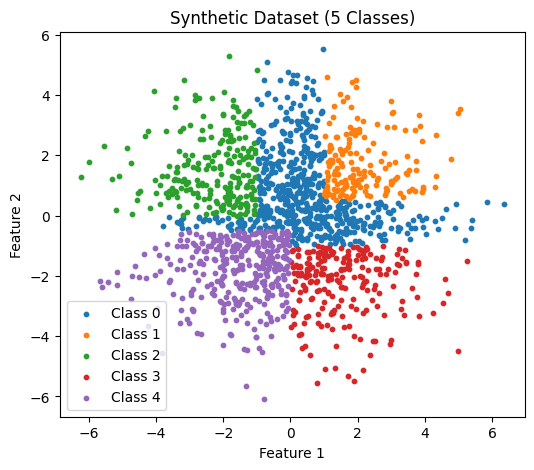

In [20]:
# Visualize dataset
plt.figure(figsize=(6,5))
for i in range(5):
    plt.scatter(X[Y_raw==i,0], X[Y_raw==i,1], s=10, label=f"Class {i}")
plt.title("Synthetic Dataset (5 Classes)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [ ]:

# Neural Network Definition
class NeuralNetwork(object):
    def __init__(self):
 
        inputLayerNeurons = 2
        hiddenLayer1 = 10
        hiddenLayer2 = 10
        hiddenLayer3 = 10
        outputNeurons = 5

        self.learning_rate = 0.01

        # Weight Initialization (unchanged)
        self.W_H1 = np.random.randn(inputLayerNeurons, hiddenLayer1)
        self.W_H2 = np.random.randn(hiddenLayer1, hiddenLayer2)
        self.W_H3 = np.random.randn(hiddenLayer2, hiddenLayer3)
        self.W_O  = np.random.randn(hiddenLayer3, outputNeurons)

    # Sigmoid activation for hidden layers
    def sigmoid(self, x, der=False):
        s = 1/(1+np.exp(-x))
        if der:
            return s*(1-s)
        return s

    # Softmax activation for output
    def softmax(self, x):
        e = np.exp(x - np.max(x, axis=1, keepdims=True))
        return e / np.sum(e, axis=1, keepdims=True)

    # Forward pass
    def feedForward(self, X):
        self.Z1 = np.dot(X, self.W_H1)
        self.A1 = self.sigmoid(self.Z1)

        self.Z2 = np.dot(self.A1, self.W_H2)
        self.A2 = self.sigmoid(self.Z2)

        self.Z3 = np.dot(self.A2, self.W_H3)
        self.A3 = self.sigmoid(self.Z3)

        self.Z4 = np.dot(self.A3, self.W_O)
        self.pred = self.softmax(self.Z4)

        return self.pred

    # Backpropagation
    def backPropagation(self, X, Y, pred):

        m = X.shape[0]

        # Output error
        output_error = (pred - Y) / m
        output_delta = output_error

        # Hidden layer 3
        hidden3_error = output_delta.dot(self.W_O.T)
        hidden3_delta = hidden3_error * self.sigmoid(self.A3, der=True)

        # Hidden layer 2
        hidden2_error = hidden3_delta.dot(self.W_H3.T)
        hidden2_delta = hidden2_error * self.sigmoid(self.A2, der=True)

        # Hidden layer 1
        hidden1_error = hidden2_delta.dot(self.W_H2.T)
        hidden1_delta = hidden1_error * self.sigmoid(self.A1, der=True)

        # Weight updates
        self.W_O  -= self.learning_rate * self.A3.T.dot(output_delta)
        self.W_H3 -= self.learning_rate * self.A2.T.dot(hidden3_delta)
        self.W_H2 -= self.learning_rate * self.A1.T.dot(hidden2_delta)
        self.W_H1 -= self.learning_rate * X.T.dot(hidden1_delta)

    # Train one epoch
    def train(self, X, Y):
        pred = self.feedForward(X)
        self.backPropagation(X, Y, pred)

**Sigmoid in Hidden Layers:**  
- Adds non-linearity, so the network can learn complex patterns.  
- Maps values between 0 and 1 for stable calculations.

**Softmax + Cross-Entropy in Output Layer:**  
- Softmax converts outputs into probabilities for each class.  
- Cross-entropy measures how far predicted probabilities are from true labels.  
- Ideal for multi-class classification.

**Backpropagation and Weight Updates:**  
- Calculates how much each weight should change to reduce error.  
- Repeated updates (gradient descent) help the network learn correct classifications.


Epoch: 0 Loss: 2.1190142815140454
Epoch: 200 Loss: 1.469221227945042
Epoch: 400 Loss: 1.3475709814227508
Epoch: 600 Loss: 1.281265135508879
Epoch: 800 Loss: 1.2268771080594705
Epoch: 1000 Loss: 1.1811833962058276
Epoch: 1200 Loss: 1.1434882065431764
Epoch: 1400 Loss: 1.11248021995542
Epoch: 1600 Loss: 1.0865226434766972
Epoch: 1800 Loss: 1.064075816328913


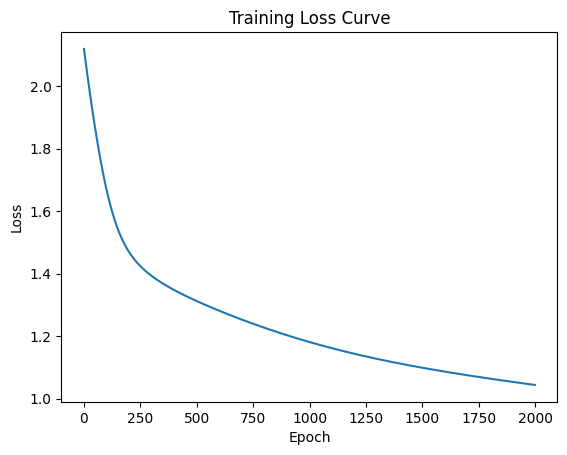

In [22]:
# Training
NN = NeuralNetwork()
errors = []
epochs = 2000

for i in range(epochs):
    NN.train(X_train, Y_train)
    pred = NN.feedForward(X_train)

    # Cross-entropy loss
    loss = -np.mean(np.sum(Y_train * np.log(pred + 1e-8), axis=1))
    errors.append(loss)

    if i % 200 == 0:
        print("Epoch:", i, "Loss:", loss)


# Loss Curve
plt.plot(errors)
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

**Observation:** Loss decreases steadily, showing network is learning.

Test Accuracy: 0.5493333333333333

Class 0:
 Precision: 0.57435897432952
 Recall   : 0.8235294117041522
 F1-Score : 0.6767371552388167

Class 1:
 Precision: 0.0
 Recall   : 0.0
 F1-Score : 0.0

Class 2:
 Precision: 0.0
 Recall   : 0.0
 F1-Score : 0.0

Class 3:
 Precision: 0.9999999975
 Recall   : 0.07272727271404958
 F1-Score : 0.13559321902901464

Class 4:
 Precision: 0.5113636363345816
 Recall   : 0.999999999888889
 F1-Score : 0.6766917247950704


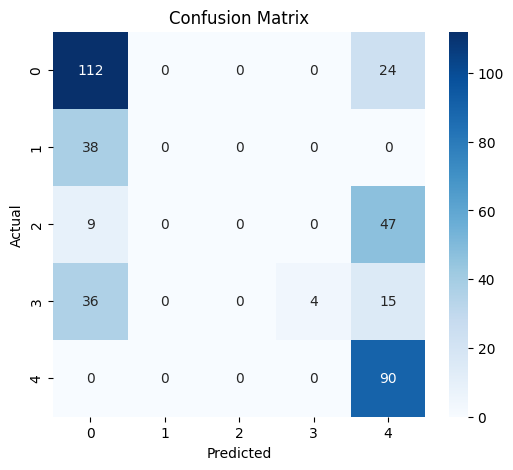

In [23]:
 # Testing and Evaluation
pred_test = NN.feedForward(X_test)
y_pred = np.argmax(pred_test, axis=1)
y_true = np.argmax(Y_test, axis=1)

# Accuracy
accuracy = np.mean(y_pred == y_true)
print("Test Accuracy:", accuracy)

# Precision, Recall, F1-score
num_classes = 5
precision = []
recall = []
f1 = []

for c in range(num_classes):
    TP = np.sum((y_pred == c) & (y_true == c))
    FP = np.sum((y_pred == c) & (y_true != c))
    FN = np.sum((y_pred != c) & (y_true == c))

    prec = TP / (TP + FP + 1e-8)
    rec  = TP / (TP + FN + 1e-8)
    f1_c = 2 * prec * rec / (prec + rec + 1e-8)

    precision.append(prec)
    recall.append(rec)
    f1.append(f1_c)

    print(f"\nClass {c}:")
    print(" Precision:", prec)
    print(" Recall   :", rec)
    print(" F1-Score :", f1_c)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Observations:**  

- Class 0 is predicted fairly well. Precision = 0.574 and Recall = 0.824 indicate that most true Class 0 samples are recognized.  
- Class 1 and Class 2 are completely misclassified. Precision, Recall, and F1-Score = 0, meaning the network fails to recognize these classes.  
- Class 3 has very high precision (≈1.0) but extremely low recall (≈0.073), showing that when the network predicts Class 3, it is usually correct, but it rarely predicts this class.  
- Class 4 has high recall (≈1.0) but moderate precision (≈0.511), meaning almost all true Class 4 samples are recognized, but some predictions are incorrect.  
- Overall test accuracy is ≈54.9%, moderate due to imbalanced predictions across classes.

**Key Findings:**  
- The network is biased toward Class 0 and Class 4, likely due to weight initialization, small hidden layers, or vanishing gradients from sigmoid activation.  
- Sigmoid in hidden layers may cause very small gradients, making it hard for the network to learn all five classes.  
- Softmax with cross-entropy is appropriate for multi-class classification, but the network struggles to separate all classes effectively.  

**Challenges:**  
- Classes 1–2 are completely ignored, likely due to vanishing gradients or class imbalance.  
- Learning rate may be insufficient to overcome initial random weights.  
- Sigmoid activation slows training and can make deeper layers harder to optimize.  

**Potential Improvements:**  
- Replace sigmoid with ReLU in hidden layers to mitigate vanishing gradients.  
- Increase the number of neurons or layers to capture complex decision boundaries.  
- Use the Adam optimizer for faster and more stable convergence.  
- Balance the dataset or enhance class separability to improve learning.  

**Lessons Learned:**  
- Multi-class classification requires careful network design, activation function choice, and hyperparameter tuning.  
- Visualization tools (loss curves, confusion matrices) are essential to identify misclassification patterns.  
- Sigmoid hidden layers may fail to learn all classes if the network is shallow or dataset classes overlap.